# Solution Ivan Blagojevic


## Data Pre-Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('task_data_churned.csv')

In [3]:
data.head()

,ws_users_activated,ws_users_deactivated,ws_users_invited,action_create_project,action_export_report,action_api_and_webhooks,action_time_entries_via_tracker,action_start_trial,action_import_csv,action_create_invoice,...,action_screenshots,action_create_custom_field,country,value_days_to_purchase,value_number_of_active_months,value_transactions_number,value_regular_seats,value_kiosk_seats,revenue,churned_status
0,3,2,0,5,8,0,0,0,0,0,...,NaN,NaN,Canada,2,0,6,3,0,184.925,No
1,6,1,0,35,106,0,33,0,1,0,...,NaN,3.0,United Kingdom,37,9,9,6,0,608.842,No
2,2,0,0,3,3,0,0,0,0,0,...,1.0,NaN,Florida,98,3,12,3,0,395.122,No
3,1,0,0,0,0,0,0,0,0,0,...,1.0,NaN,Kentucky,0,1,2,1,0,25.974,Yes
4,1,0,0,0,0,1,0,0,0,0,...,NaN,NaN,Ireland,21,2,3,1,0,38.961,Yes


Let's get some general info about the dataset:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ws_users_activated               2502 non-null   int64  
 1   ws_users_deactivated             2502 non-null   int64  
 2   ws_users_invited                 2502 non-null   int64  
 3   action_create_project            2502 non-null   int64  
 4   action_export_report             2502 non-null   int64  
 5   action_api_and_webhooks          2502 non-null   int64  
 6   action_time_entries_via_tracker  2502 non-null   int64  
 7   action_start_trial               2502 non-null   int64  
 8   action_import_csv                2502 non-null   int64  
 9   action_create_invoice            2502 non-null   int64  
 10  action_lock_entries              2502 non-null   int64  
 11  action_add_targets               2502 non-null   int64  
 12  action_connect_quick

In [5]:
data.isnull().sum()

ws_users_activated                    0
ws_users_deactivated                  0
ws_users_invited                      0
action_create_project                 0
action_export_report                  0
action_api_and_webhooks               0
action_time_entries_via_tracker       0
action_start_trial                    0
action_import_csv                     0
action_create_invoice                 0
action_lock_entries                   0
action_add_targets                    0
action_connect_quickbooks             0
action_create_expense                 0
action_project_budget                 0
action_gps_tracking                1626
action_screenshots                 1458
action_create_custom_field         2059
country                              84
value_days_to_purchase                0
value_number_of_active_months         0
value_transactions_number             0
value_regular_seats                   0
value_kiosk_seats                     0
revenue                               0


There are three numeric columns which contain NULL values. We don't have information about these clients' actions, so let's insert zeros instead of NULLs:

In [6]:
data[['action_gps_tracking', 'action_screenshots', 'action_create_custom_field']] = data[['action_gps_tracking', 'action_screenshots', 'action_create_custom_field']].fillna(0)

Some basic statistics about this dataset:

In [7]:
data.describe(include = 'all')

,ws_users_activated,ws_users_deactivated,ws_users_invited,action_create_project,action_export_report,action_api_and_webhooks,action_time_entries_via_tracker,action_start_trial,action_import_csv,action_create_invoice,...,action_screenshots,action_create_custom_field,country,value_days_to_purchase,value_number_of_active_months,value_transactions_number,value_regular_seats,value_kiosk_seats,revenue,churned_status
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,...,2502.000000,2502.000000,2418,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,California,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,247,NaN,NaN,NaN,NaN,NaN,NaN,1703
mean,5.619504,0.827738,0.158273,28.043965,22.709432,0.383293,19.479616,0.175859,0.622702,8.494005,...,0.591527,1.282974,NaN,61.286571,4.215827,5.728617,6.067946,0.257794,378.331825,NaN
std,11.364130,3.527056,0.784527,80.761092,80.884964,3.089846,114.856050,0.380777,4.770705,52.699928,...,0.866208,5.598368,NaN,85.179584,3.691711,4.893211,11.766325,2.957970,1007.971191,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,1.000000,1.000000,2.000000,1.000000,0.000000,38.961000,NaN
50%,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,24.000000,3.000000,4.000000,2.000000,0.000000,105.761500,NaN
75%,6.000000,0.000000,0.000000,26.000000,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,NaN,84.750000,7.000000,8.000000,6.000000,0.000000,333.459750,NaN


Since churned_status column will be used as the target output, let's update its values from Yes/No to 1/0.
Also, let's remove column country. It contains 155 unique text values, which is too much for converting it into a useful categorical variable (wee need to have numeric/categorical inputs).

In [8]:
data = data.drop('country', axis = 1)
data.head()

,ws_users_activated,ws_users_deactivated,ws_users_invited,action_create_project,action_export_report,action_api_and_webhooks,action_time_entries_via_tracker,action_start_trial,action_import_csv,action_create_invoice,...,action_gps_tracking,action_screenshots,action_create_custom_field,value_days_to_purchase,value_number_of_active_months,value_transactions_number,value_regular_seats,value_kiosk_seats,revenue,churned_status
0,3,2,0,5,8,0,0,0,0,0,...,0.0,0.0,0.0,2,0,6,3,0,184.925,No
1,6,1,0,35,106,0,33,0,1,0,...,0.0,0.0,3.0,37,9,9,6,0,608.842,No
2,2,0,0,3,3,0,0,0,0,0,...,0.0,1.0,0.0,98,3,12,3,0,395.122,No
3,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0,1,2,1,0,25.974,Yes
4,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,21,2,3,1,0,38.961,Yes


In [9]:
data['churned_status'] = data['churned_status'].map({'Yes' : 1, 'No' : 0})
data.head()

,ws_users_activated,ws_users_deactivated,ws_users_invited,action_create_project,action_export_report,action_api_and_webhooks,action_time_entries_via_tracker,action_start_trial,action_import_csv,action_create_invoice,...,action_gps_tracking,action_screenshots,action_create_custom_field,value_days_to_purchase,value_number_of_active_months,value_transactions_number,value_regular_seats,value_kiosk_seats,revenue,churned_status
0,3,2,0,5,8,0,0,0,0,0,...,0.0,0.0,0.0,2,0,6,3,0,184.925,0
1,6,1,0,35,106,0,33,0,1,0,...,0.0,0.0,3.0,37,9,9,6,0,608.842,0
2,2,0,0,3,3,0,0,0,0,0,...,0.0,1.0,0.0,98,3,12,3,0,395.122,0
3,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0,1,2,1,0,25.974,1
4,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,21,2,3,1,0,38.961,1


## Exploratory Data Analysis

First, let's see what's the churn frequency in our dataset, i.e. how biased is our dataset. 

In [10]:
print("Churn frequency: ", format(data['churned_status'].sum() / len(data), ".1%"))

Churn frequency:  31.9%


There are a lot more non-churn samples in our dataset (as expected). This has to be considered when we: 
- choose the prediction method
- divide the dataset into train and test subsets
- evaluate model performance

There are 24 numeric input labels/columns available. Let's explore them and try to answer some question about clients' behaviour.

Let's write a function for visualising the distribution and density of churns/non-churns for different input variables:

In [11]:
def PlotData (df, col):
    churned = df.loc[df['churned_status'] == 1]
    not_churned = df.loc[df['churned_status'] == 0]
    
    fig, axes = plt.subplots(1, 2, sharex= True, sharey = True)
    fig.tight_layout()
    sns.histplot(churned[col], color = 'orange', kde = False, ax = axes[0]).set(title = 'Churned' , ylabel = '')
    sns.histplot(not_churned[col], color = 'blue', kde = False, ax = axes[1]).set(title = 'Not Churned', ylabel = '')
    plt.show()
    
    plt.figure()
# Kernel Density Estimate plot - visualises the distribution of observations in a dataset, 
# represents the data using a continious probability density curve
    sns.kdeplot(df.loc[df.churned_status == 1, col],color='orange',label='Churned')
    sns.kdeplot(df.loc[df.churned_status == 0, col],color='blue',label='Not Churned')
    plt.legend();

I'd like to see how does number of active months affect churn status.

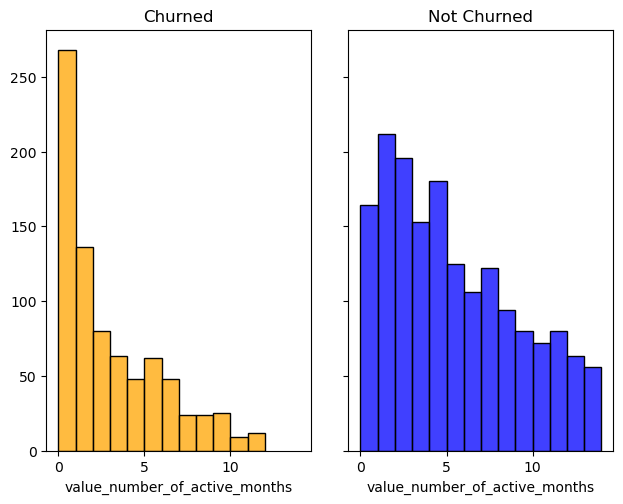

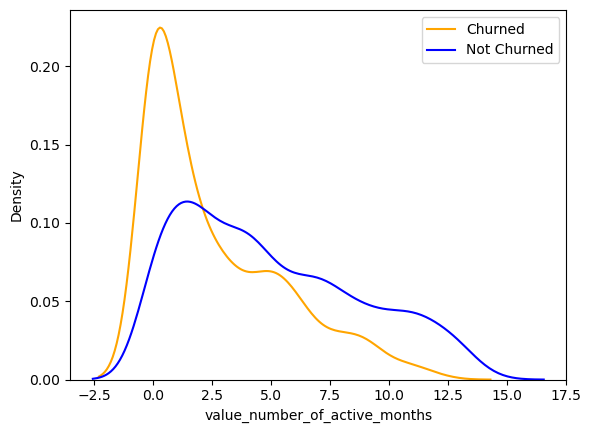

In [12]:
PlotData(data, 'value_number_of_active_months')

We can observe that it's far less likely for a client to churn if it's active for a longer period of time.
This could be assumed, but it's good to see the pattern in the data!
<br>Also, the number of churned clients is larger than not churned only for value_number_of_active_months = 0 (clients who recently started to use the service). This is not so surprising, but it can be a signal to dedicate more resources to retaining new joiners.

<br>I'd like to see if clients behave differently based on trial activation status. 

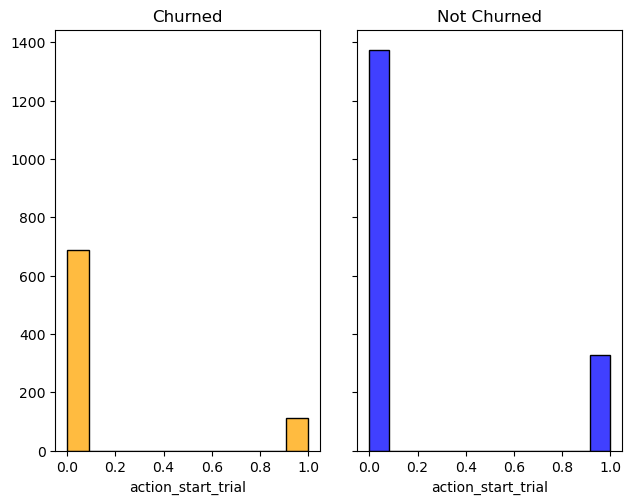

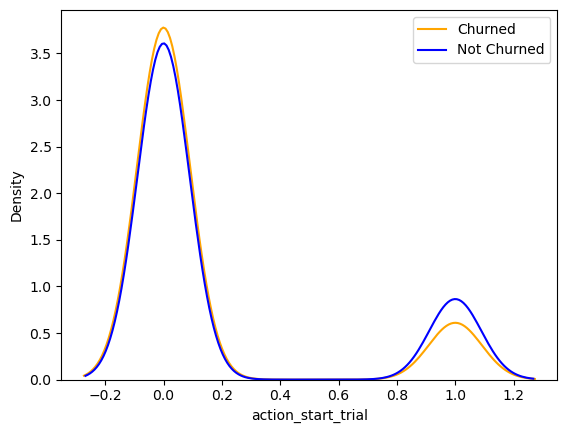

In [13]:
PlotData(data, 'action_start_trial')

Obviously, far more clients don't start trial (check histograms, bars for x=0 are way higher than for x=1). 
<br>Of course, these plots don't make much sense here because this is a binary variable!
<br>It could be interesting to compare churn rate for the two groups:

In [14]:
print("Trial activated")
print("Number of clients: ", data['action_start_trial'].sum())
print ("Churn rate: ", format(len(data.loc[(data['churned_status'] == 1) & (data['action_start_trial'] == 1)]) / data['action_start_trial'].sum(), ".1%"), "\n")
print("Trial not activated")
print("Number of clients: ", len(data.loc[data['action_start_trial'] == 0]))
print ("Churn rate: ", format(len(data.loc[(data['churned_status'] == 1) & (data['action_start_trial'] == 0)]) / len(data.loc[data['action_start_trial'] == 0]), ".1%"))


Trial activated
Number of clients:  440
Churn rate:  25.2% 

Trial not activated
Number of clients:  2062
Churn rate:  33.4%


We observe higher churn rate for the group which hasn't started trial. This makes sense intuitively, although we should bear in mind that this conclusion is just for informative purposes (our dataset is biased towards clients who haven't activated trial and this is not a valid statistical method for checking our hypothesis).

Let's now check how days to purchase affect churn status.

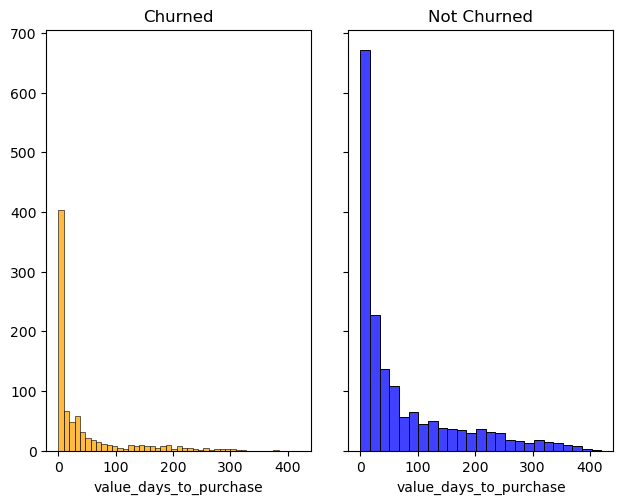

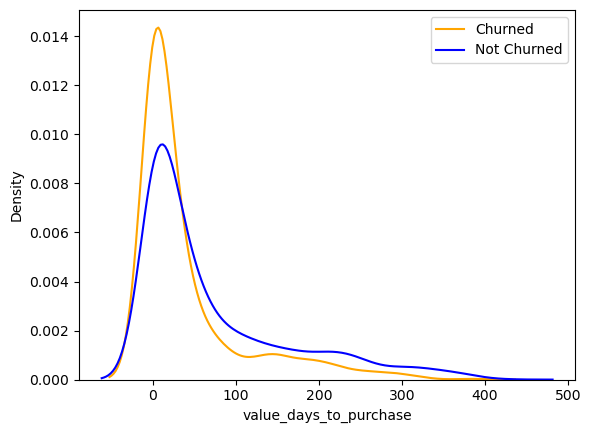

In [15]:
PlotData(data, 'value_days_to_purchase')

It's maybe interesting to look at Churned histogram, there is a small peak in number of churned clients around day 30. Could  that be related to the end of some promo period?

Let's observe the number of users activated in this context. I'd expect to see that clients who have activated more users are less likely to churn.

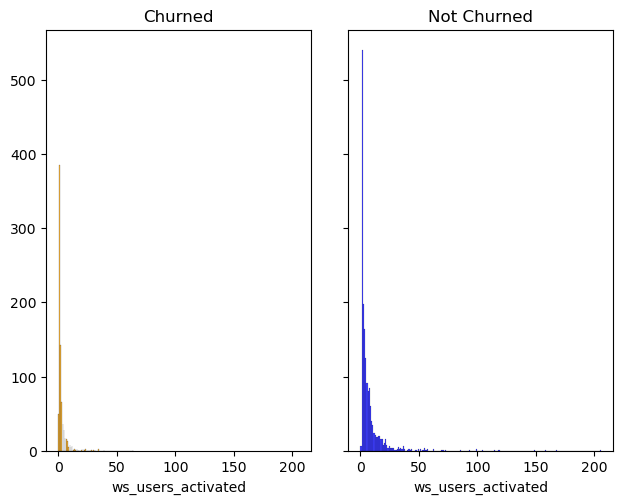

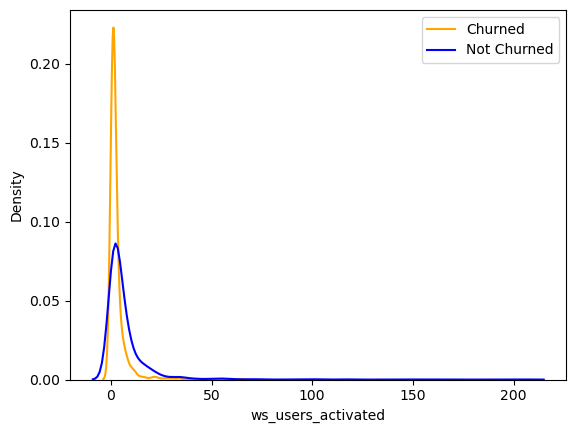

In [16]:
PlotData(data, 'ws_users_activated')

As expected, from the density plot we read that density of users_activated is much more narrow around zero for churned clients.

Let's now check the relationship between the revenue amount and churn status. I expect that clients who bring higher revenue are satisfied with the service and less likely to churn.

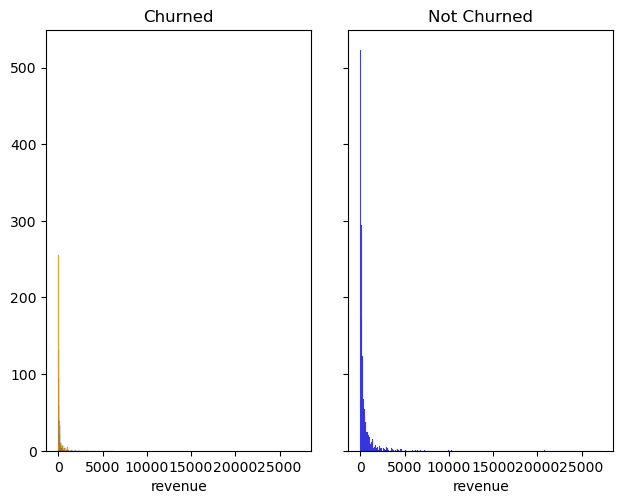

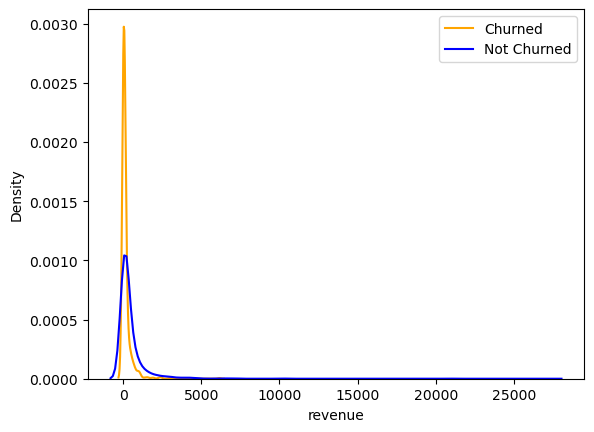

In [17]:
PlotData(data, 'revenue')

These plots are not so informative because the majority of clients bring smaller revenue and there are some outliers with high revenue amounts, so our x-scale is very streched. Anyway, we observe that higher revenue clients are likely to continue to use the service!

Now let's see if there is difference in distribution of churned and not churned group with respect to number of transactions created. My expectation is non churned clients have more transactions created.

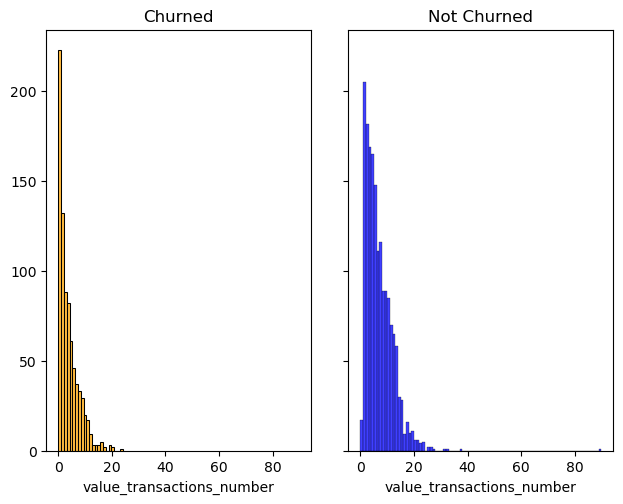

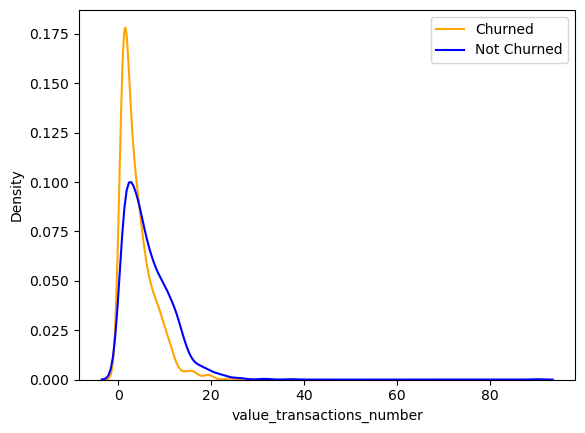

In [18]:
PlotData(data, 'value_transactions_number')

## Prediction Model Selection

We're trying to answer the question whether a client will churn or not, which means we're solving a binary classification problem.
<br>Basically, we want to get probability of churn at model's output. If that probability is higher than a selected treshold, our prediction is that client will churn (and vice-versa).
<br>One type of classifiers suitable for this kind of problems is <b>logistic regression</b>.
<br>It's a simple model, so it doesn't require much time for training. It can handle a large number of input features, and calculated parameters are easily interpretable.
<br> This model uses logistic function: P(X) = e<sup>X</sup>/(1 + e<sup>X</sup>) = 1/(1 + e<sup>-X</sup>) , 
<br>so its output range is interval [0, 1].
<br><br> As every regression algorithm, logistic regression is highly sensitive to multicollinearity.
<br>Multicollinearity exists when there is strong positive or negative correlation between multiple independent variables (inputs) in a multiple regression model. 
<br>We want to avoid having redundant inputs which don't provide significant information because they make our prediction model more complex and our statistical inferences less reliable. When some input variables are highly correlated, it's difficult for regression model to distinguish between their individual effects on the output.
<br>We have to pay attention to this when choosing the final set of inputs for our model.

## Feature Selection

First, let's check if there are strong correlations between any two input variables.
<br>Below we'll plot the heatmap representing correlations between each pair of columns in our dataset. 

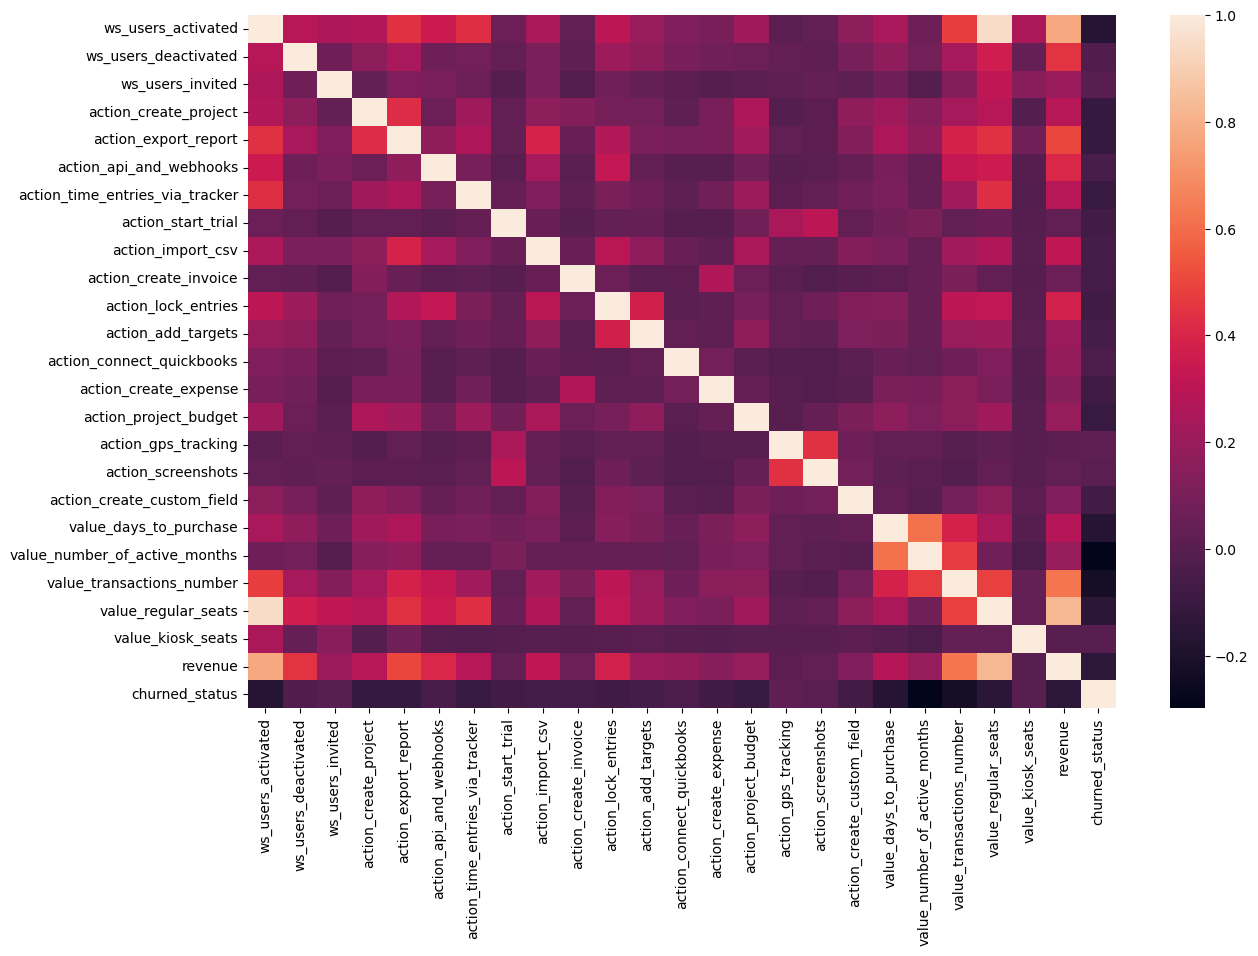

In [19]:
variable_correlations = data.corr(method='pearson')
plt.figure(figsize=(14, 9))
sns.heatmap(variable_correlations, annot=False)
plt.show()

It looks like there aren't many variables which have strong positive/negative correlation, which is good.

In [20]:
variable_correlations.unstack().drop_duplicates().sort_values(ascending=False).reset_index()[:10]

,level_0,level_1,0
0,ws_users_activated,ws_users_activated,1.000000
1,ws_users_activated,value_regular_seats,0.948636
2,value_regular_seats,revenue,0.823768
3,ws_users_activated,revenue,0.781224
4,value_transactions_number,revenue,0.629283
5,value_days_to_purchase,value_number_of_active_months,0.611966
6,action_export_report,revenue,0.502688
7,value_transactions_number,value_regular_seats,0.483433
8,ws_users_activated,value_transactions_number,0.476063
9,value_number_of_active_months,value_transactions_number,0.470586


In [21]:
variable_correlations.unstack().drop_duplicates().sort_values(ascending=False).reset_index()[-10:]

,level_0,level_1,0
291,action_time_entries_via_tracker,churned_status,-0.100396
292,action_project_budget,churned_status,-0.102300
293,action_export_report,churned_status,-0.111169
294,action_create_project,churned_status,-0.115451
295,revenue,churned_status,-0.142663
296,value_regular_seats,churned_status,-0.150795
297,ws_users_activated,churned_status,-0.166974
298,value_days_to_purchase,churned_status,-0.169235
299,value_transactions_number,churned_status,-0.223975
300,value_number_of_active_months,churned_status,-0.298096


As we could assume from the correlation heatmap, there are no many pairs of input features with strong positive or negative correlation.
<br>It's interesting to see that strongest negative correlations exist between churned_status and number of different actions, as expected.

There is a strong positive correlation (0.95) between ws_users_activated and value_regular_seats. 
<br>We can drop one of those inputs from the dataset. We'll drop the one which has weaker correlation with the output variable (that one "contributes less" to the output).  

In [22]:
print("Correlation between ws_users_activated and churned_status = ", format(variable_correlations.loc['churned_status']['ws_users_activated'], '.3'))
print("Correlation between value_regular_seats and churned_status = ", format(variable_correlations.loc['churned_status']['value_regular_seats'], '.3'))

Correlation between ws_users_activated and churned_status =  -0.167
Correlation between value_regular_seats and churned_status =  -0.151


value_regular_seats has a slightly weaker negative correlation with the output variable, so we're going to exclude it from the input dataset.

In [23]:
data = data.drop(['value_regular_seats'], axis = 1)
data.head()

,ws_users_activated,ws_users_deactivated,ws_users_invited,action_create_project,action_export_report,action_api_and_webhooks,action_time_entries_via_tracker,action_start_trial,action_import_csv,action_create_invoice,...,action_project_budget,action_gps_tracking,action_screenshots,action_create_custom_field,value_days_to_purchase,value_number_of_active_months,value_transactions_number,value_kiosk_seats,revenue,churned_status
0,3,2,0,5,8,0,0,0,0,0,...,0,0.0,0.0,0.0,2,0,6,0,184.925,0
1,6,1,0,35,106,0,33,0,1,0,...,3,0.0,0.0,3.0,37,9,9,0,608.842,0
2,2,0,0,3,3,0,0,0,0,0,...,9,0.0,1.0,0.0,98,3,12,0,395.122,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1.0,1.0,0.0,0,1,2,0,25.974,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0.0,0.0,0.0,21,2,3,0,38.961,1


Besides checking if any two input variables are strongly correlated, it's good to check if there is additional multicollinearity in our input dataset. In order to do it we can calculate the Variance Inflation Factor (VIF) for every input variable.
<br><br>For every input X<sub>i</sub>, VIF<sub>i</sub> = 1/(1 - R<sub>i</sub><sup>2</sup>) ; where R<sub>i</sub><sup>2</sup> is the coefficient of determination for X<sub>i</sub>.
<br><br>In general, R<sup>2</sup> represents the proportion of the variation in a dependent variable that is predictable from the independent variable(s) (it tells us how well model fits the target). It's typically in range [0, 1] (although, in theory, it can go negative).
<br><br>Basically, for each input variable X<sub>i</sub>, we apply linear regression, so that X<sub>i</sub> is used as target output (dependent variable) and all other input variables are used as inputs (independent variables).
<br>R<sub>i</sub><sup>2</sup> measures if input X<sub>i</sub> can be represented as a linear combination of other input variables. Higher R<sub>i</sub><sup>2</sup> means that X<sub>i</sub> doesn't carry much information on its own (and vice-versa).
<br>For higher R<sub>i</sub><sup>2</sup>, we will get higher VIF<sub>i</sub> as well (and vice-versa).
<br>Usually in practice if VIF<sub>i</sub> is higher than 5, we will remove the X<sub>i</sub> from our input dataset (since changes in X<sub>i</sub> can mostly be explained by changes in other input variables - high multicollinearity).

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_df = pd.DataFrame()

# according to this post by the function's author, 
# variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables 
# https://github.com/statsmodels/statsmodels/issues/2376

temp_inputs = add_constant(data.drop(['churned_status'], axis = 1)) # we're not using the output column for this analysis
VIF_df['Inputs'] = temp_inputs.columns
VIF_df['VIF'] = [variance_inflation_factor(temp_inputs.values, i) 
               for i in range(temp_inputs.shape[1])]
VIF_df['VIF'] = round(VIF_df['VIF'], 3)
VIF_df = VIF_df.sort_values(by = 'VIF', ascending = False)
VIF_df

,Inputs,VIF
23,revenue,4.813
0,const,3.914
1,ws_users_activated,3.904
21,value_transactions_number,2.263
20,value_number_of_active_months,1.996
19,value_days_to_purchase,1.770
5,action_export_report,1.708
11,action_lock_entries,1.466
6,action_api_and_webhooks,1.358
4,action_create_project,1.346


As we can see, none of the inputs has VIF higher than 5, so we won't remove any of them.

## Dataset Split

Before feeding the data into a logistic regression model, we want to split the available dataset into the training and test subset.
<br>Model's parameters will be "learned" based on the training dataset. Then, we're going to use the test dataset to check model's preformance on unknown data (we want to avoid overfitting the training dataset in our prediction model).
<br>80% of randomly selected data available will be used for training, and other 20% will be used for testing purposes.

In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('churned_status', axis = 1) # inputs
Y = data['churned_status'] # outputs

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) 
# random_state - controls the shuffling applied to the data before applying the split (reproducible output across multiple function calls)

We're using parameter stratify=Y to make sure we get the same churn rate in the train and test datasets as in original data. This is important because our data contains significantly more non-churned samples (our dataset isn't balanced).

## Feature Scaling

For algorithms which calculate distances between data points it's important to have input features that take values from similar ranges. If this is not the case, inputs with high value range become dominant, even though they don't necessarily carry more information about the output. (For example, in our case, columns revenue and action_start_trial are taking values from vastly different ranges.)
<br>Because of this, it is important to put inputs on a common scale before training a model, without distorting the differences in the range of values for every input.
<br> This standardisation should rescale each input feature separately so that it has mean = 0 and variance = 1. We can achieve this by applying the following formula: X<sub>i</sub>scaled = (X<sub>i</sub> - Mean<sub>i</sub>) / Std_Dev<sub>i</sub>
<br><br>When applying feature scaling, it's important to do it only on the training input dataset! Test data shouldn't affect these transformations, we should use it only for measuring model's performance after training. Input features from the test dataset will be scaled using the mean value and standard deviation of the corresponding features from the training dataset. In Python we can easily apply scaling of both input datasets with functions fit_transform() and transform().

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # scale training data and learn scaling parameters for each input variable
X_test_scaled = scaler.transform(X_test) # scale test data with previously learned scaling parameters
# scaled datasets are added to new variables
# just to make sure we always get the same input datasets if we run this cell multiple times

## Prediction Model Training

We'll feed input and output test datasets into a logistic regression model. For this we can use scikit-learn library.

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

Now our model is trained based on the train dataset. We can observe its parameters:

In [28]:
model.coef_ # there are 23 coefficients because we have 23 input variables

array([[-1.19480436,  0.20033868,  0.091793  , -0.14570175, -0.02286797,
         0.0109062 , -0.80141728, -0.07651931, -0.09779356, -0.06696563,
        -0.13702875,  0.07399795, -0.18684118, -0.60000122, -0.04150928,
         0.07764251,  0.0415943 , -0.1129676 ,  0.34167101, -0.91908   ,
        -0.03657432,  0.16338844, -0.13702185]])

In [29]:
model.intercept_

array([-1.23734068])

## Model Performance Validation

Now let's feed test input dataset into our mdoel and get churn predictions:

In [30]:
Y_predictions = model.predict(X_test_scaled)
Y_predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Let's compare our predictions to test outputs by creating confusion matrix:

In [31]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(Y_test, Y_predictions)
conf

array([[295,  46],
       [ 92,  68]], dtype=int64)

Now we can calculate model's accuracy. That's the portion of predictions which were true: 
<br>Accuracy = (TP + TN)/(TP + FP + TN + FN)
<br><br>This measure will have a value close to 1 if our model doesn't make many mistakes.

In [32]:
accuracy = (conf[0][0] + conf[1][1])/conf.sum()
print("Accuracy = ", format(accuracy, ".3"))

Accuracy =  0.725


This result doesn't look bad, but we have to bear in mind that our dataset is biased and contains around 70% of non-churn samples.
<br>We could achieve similar Accuracy if we predicted all test samples as non-churn!
<br>In order to deal with this potential problem, let's see how precise are our positive predictions:
<br>Precision = TP/(TP + FP)
<br><br>Precision shows us if there is a problem with "cheating accuracy" (if all test samples are predicted as non-churn, then we would have Precision = 0/0).
<br>The goal of Precision is to minimise mistakes in guessing positive outputs (in our case churns).
<br>Precision will be close to 1 if there are no many false positive guesses.

In [33]:
precision = conf[1][1]/(conf[1][1] + conf[0][1])
print("Precision = ", format(precision, ".3"))

Precision =  0.596


Our Precision score suggests that around 40% of times when we predict a client is churned it actually isn't.
<br>Of course, this is not good, but it's not such a big deal if we have some false positive predictions.
<br><br>False negative predictions (FNs) are significantly larger issue, because FNs represent clients who would be predicted as non-churned and they actually churned!
<br>Because of this, let's check how well are positive labels (churns) recalled. We can use the following formula:
<br>Recall = TP/(TP + FN)
<br><br>Recall will be close to 1 if we successfully recognise majority of positive labels.

In [34]:
recall = conf[1][1]/(conf[1][1] + conf[1][0])
print("Recall = ", format(recall, ".3"))

Recall =  0.425


Our Recall score suggests that in 57.5% of cases when there was a client who churned in our test dataset, we wrongly predicted it as non-churn! This is not good at all and we would have to pay attention to this issue during further development of our churn prediction model!

In general, it's interesting to notice is that Precision and Recall are complementary measures.
<br><br>Precision can be "cheated" if a model makes one TP predicition and all other predictions as negative. In this case Precision would be 1, but Recall would be low (because of many FNs). 
<br><br>Similarly, Recall can be "cheated" if a model predicts everything as positive. Then Recall would be 1, but Precision would be low (because of many FPs).
<br><br> In order to prevent this, we want to introduce a measure that penalises Precision and Recall disagreeing with each other significantly, i.e. we want to find a measure which balances between the quality and completeness of our predictions. 
<br>For this purpose we use harmonic mean of Precision and Recall, called as F1_score:
<br><br>F1_score = 2 * Precision * Recall/(Precision + Recall)
<br><br>Harmonic mean weights the F1_score towards the lower of two components. This measure is especially important when there is class imbalance in outputs.

In [35]:
f1 = 2 * precision * recall/(precision + recall)
print("F1_score = ", format(f1, ".3"))

F1_score =  0.496


Let's put these model performance measures into one function, just so we can easily reuse it:

In [36]:
def performance_measures(Y_true, Y_predicted):
    
    conf = confusion_matrix(Y_true, Y_predicted)
    print(conf)
    
    accuracy = (conf[0][0] + conf[1][1])/conf.sum()
    print("Accuracy = ", format(accuracy, ".3"))
    
    precision = conf[1][1]/(conf[1][1] + conf[0][1])
    print("Precision = ", format(precision, ".3"))
    
    recall = conf[1][1]/(conf[1][1] + conf[1][0])
    print("Recall = ", format(recall, ".3"))
    
    f1 = 2 * precision * recall/(precision + recall)
    print("F1_score = ", format(f1, ".3"))

<br>Since I'm not satisfied with the performance, I can check how well would outputs be predicted for the training dataset. If it performs significantly better, then our model probably overfits the training dataset.

In [37]:
Y_train_predictions = model.predict(X_train_scaled)
Y_train_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
performance_measures(Y_train, Y_train_predictions)

[[1201  161]
 [ 347  292]]
Accuracy =  0.746
Precision =  0.645
Recall =  0.457
F1_score =  0.535


Our model's performance is a bit better on the training dataset, but not significantly.

## Model Improvements

Logistic regression models have several hyperparameters. We can try to update some of them and observe changes in model behaviour.

Let's try to mitigate the class imbalance issue in our data. Logistic regression has a class_weight hyperparameter. If not given, all classes are supposed to have weight equal one. The “balanced” mode uses the values of Y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [39]:
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train_scaled, Y_train)

LogisticRegression(class_weight='balanced')

In [40]:
Y_predictions_balanced = model_balanced.predict(X_test_scaled)

In [41]:
performance_measures(Y_test, Y_predictions_balanced)

[[194 147]
 [ 47 113]]
Accuracy =  0.613
Precision =  0.435
Recall =  0.706
F1_score =  0.538


Test results are definitely different when this parameter is included!
<br>It's important to note we're using exactly the same datasets for training and testing different models!
<br><br>By comparing statistical measures and confusion matrices between the two models, we can see there are tradeoffs.
<br>Our second model produces less false negatives and more false positives. 
<br>This leads to worse Accuracy and Precision. On the other hand, Recall is significantly improved and overall F1_score is higher. 
<br><br>I would say this a good tradeoff. Yes, there are more mistakes in total, but number of false negatives in the test dataset is almost halved. 

<br>Another LogisticRegression hyperparameter we can tune is C - inverse of regularisation strength. Regularisation represents the concept that we should include a penalty for model's extreme parameters. The idea is that just focusing on training data and not punishing the model for extreme parameters will generate overfitting.
<br>Regularisation helps if our model is overfit. If it's not, there is no need for regularisation.
<br><br>If C is high, that penalty for extreme parameters will be low and it's expected that model will better fit training dataset.
<br>A lower C will push our model away from the extreme parameters. That's why it's suggested to try lower values for C if we suspect our model is overfitting the training dataset.
<br><br>I've tried several values for this hyperparameter. Indeed, there are some lower values which slightly improve performance on the test dataset.

In [42]:
model_balanced_reg = LogisticRegression(class_weight='balanced', C=0.2)
model_balanced_reg.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.2, class_weight='balanced')

In [43]:
Y_pred_balanced_reg = model_balanced_reg.predict(X_test_scaled)

In [44]:
performance_measures(Y_test, Y_pred_balanced_reg)

[[193 148]
 [ 44 116]]
Accuracy =  0.617
Precision =  0.439
Recall =  0.725
F1_score =  0.547


## Further Potential Improvements

### Dataset
- Play with the number of input features and their combinations. Maybe we could sum various actions into a single feature, etc.
- Filter outliers from the training dataset. Values for most input variables are concentrated near zero, but there are some high outliers (e.g. value_days_to_purchase or revenue). Maybe those samples "confuse" and "distract" our models.
### Class Imbalance
- There are methods for synthetic creation of data for imbalanced classes (SMOTE).
### Logistic regression hyperparameters
- Try out different combinations of hyperparameters and check if there are improvements in performance.
### Explore various classifiers
- Try other algortithms like k-nearest neighbours, neural networks, etc.